# Task 6

## Part 1

Get data from https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv 

Plot: 
- the temperature 
- the mean temmperature each day 
- the mean temperature for each month


In [1]:
# import packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Setting up the data with pandas 
Before analysing the data, a series of operations need to be completed to set up the data correctly.  

- **Importing the data**: The original data has ~20 rows where the column labels are exaplained, so those rows need to be skipped when importing the dataframe (see: https://stackoverflow.com/questions/20637439/skip-rows-during-csv-import-pandas). 

- **Dtypes**: Because of the first rows of metadata, it's not possible to infer the data types from the first rows of data. For this reason, the param low_memory is set to False. This means that the data will be fully read, before dtypes are assigned. See: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. 

In [2]:
# get data from url 
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
weather = pd.read_csv(url, skiprows=22, low_memory=False)

# preview data
weather.head(10)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
5,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6
6,31-jul-1996 13:00,0,0.0,0,14.9,0,10.9,6.7,0.0,0,...,0,0,0,0,2,11,0.0,40000,43,5
7,31-jul-1996 14:00,0,0.0,0,13.9,0,10.4,6.7,0.0,0,...,0,0,0,0,2,11,0.0,50000,45,6
8,31-jul-1996 15:00,0,0.0,0,13.2,0,10.9,8.6,0.0,0,...,0,0,0,0,25,82,0.0,8000,45,7
9,31-jul-1996 16:00,0,0.0,0,15.1,0,11.3,7.5,0.0,0,...,0,0,0,0,25,82,0.0,35000,40,7


- **converting dates** and **setting date as index**: this is useful to use the resampling() and rolling() methods, to represent different intervals from the same data. 
See: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html. 

In [3]:
# change date format to datetime and set date as df index. See: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 
weather['date'] = pd.to_datetime(weather['date'], format="%d-%b-%Y %H:%M")
weather = weather.set_index('date') 
# preview data
weather.head(5)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6


- **removing irrelevat data**: There are incomplete data on year 1996 (one datapoint in April, then July-December). This incomplete data would deform the plot, so it's better removing it and having the data start from 1997/01/01. 

In [4]:
# Clean up data. Remove incomplete data on 1996 (one day in April, and then July-Dec)
new_start = '1997-01-01 00:00:00'
weather = weather.loc[new_start:]

weather.head(5)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1997-01-01 00:00:00,3,0.0,1,-2.9,1,-3.0,-3.6,4.8,98,1031.2,2,7,2,350,2,11,0.0,40000,999,1
1997-01-01 01:00:00,3,0.0,1,-2.9,5,-3.1,-3.9,4.6,93,1031.4,2,9,2,30,2,11,0.0,40000,999,1
1997-01-01 02:00:00,3,0.0,1,-3.1,5,-3.2,-3.8,4.6,95,1031.7,2,7,2,20,2,11,0.0,40000,999,1
1997-01-01 03:00:00,3,0.0,1,-3.2,5,-3.3,-3.9,4.6,95,1031.7,2,8,2,20,2,11,0.0,40000,999,1
1997-01-01 04:00:00,3,0.0,1,-3.5,5,-3.6,-4.3,4.5,94,1031.7,2,7,2,10,2,11,0.0,40000,999,1


### Temperatures

Seaborne is used to plot the temperatures in Ireland (1997-2024). 

Temperatures throughout the year are as anyone would imagine temperatures in Europe: lower during the winter months, increasing from spring and throughout the summer, and then lowering again.  

Text(0.5, 1.0, 'Temperatures in Ireland')

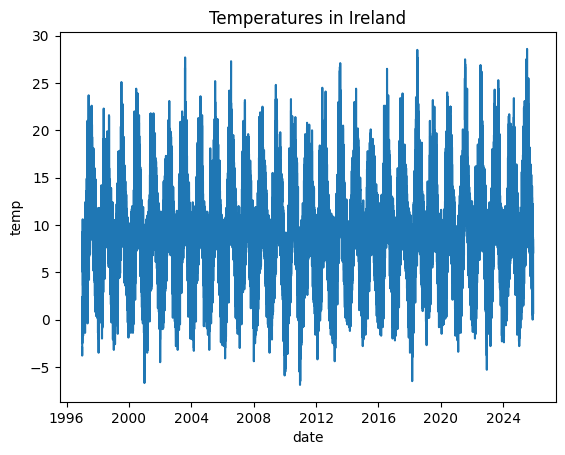

In [5]:
fig, ax = plt.subplots()
sns.lineplot(data=weather, x = 'date', y = 'temp')
plt.title('Temperatures in Ireland')

The plot shows a regular trend of temperautes, lower in the winter months and higher in spring and summer. However, some peaks can be noticed: 
- 2001, 2011 and 2018 were particularly cold years, 
- 2003, 2006, 2019 and 2024 got warmer than average. 

### Daily mean temperatures

The Pandas method resample() is used to resample the hourly data of the dataframe to create new dataframes with daily and monthly data points. Then, average temperature is calculated.  

In [6]:
# Resampling to get daily mean temperatures 
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html 
# Resampling time params: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases 
# round numbers for readability. See: https://www.geeksforgeeks.org/python/pandas-dataframe-round/
# mean: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html 

daily_t = weather['temp'].resample('D').mean().round(2)
daily_temp = pd.DataFrame(daily_t, index = daily_t.index)

# uncomment to show 
# daily_temp.head(5)

Text(0.5, 1.0, 'Daily mean temperatures in Ireland')

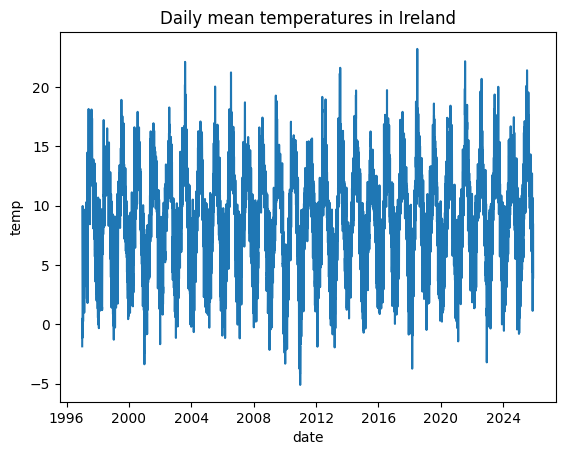

In [7]:
# plot mean daily temperature
sns.lineplot(data=daily_temp, x = 'date', y = 'temp')
plt.title('Daily mean temperatures in Ireland')

In [8]:
# resample data to get mean temperature for each month (month start)
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html 
# Resampling time params: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases 
# round numbers for readability. See: https://www.geeksforgeeks.org/python/pandas-dataframe-round/
# mean: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html 

monthly_t = weather['temp'].resample('MS').mean().round(2)

monthly_temp = pd.DataFrame(monthly_t, index = monthly_t.index)

# uncomment to show 
# monthly_temp.head(5)

Text(0.5, 1.0, 'Montly mean temperatures in Ireland')

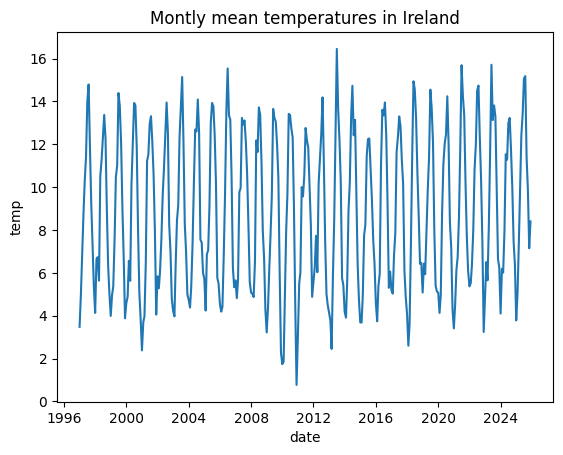

In [9]:
# plot the data 
sns.lineplot(data=monthly_temp, x = 'date', y = 'temp')
plt.title('Montly mean temperatures in Ireland')

The plots on daily and monthly mean temperatures show similar trends to the first plot about mean temperatures. However, not all the peaks appearing in the first plot are visible in the other plots, which shows that in some years, particulary low temperatures did affect the average temperature (either because they did not last much, and/or because were balanced by temperatures during the rest of the year). 

## Part 2

Plot:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)

### Windspeed

The data is cleaned up to: 
- remove empty data points (no wdsp data in the row)
- change data type to integers 

Then, the data is plotted. 

In [10]:
# create a subset without empty data and re-format data type to integers 
# see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
weather_wdsp = weather[weather['wdsp'] != ' '].copy()

# convert data type to numeric
# see: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
weather_wdsp['wdsp'] = weather_wdsp['wdsp'].astype(int)

# verify new data type 
# weather_wdsp.dtypes

Text(0.5, 1.0, 'Windspeed in Ireland')

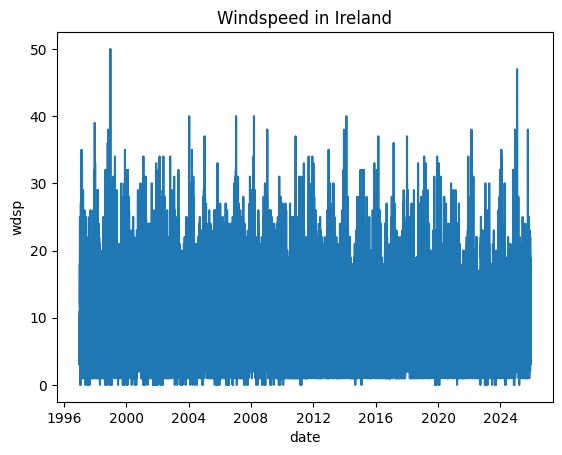

In [11]:
# Plot windspeed 
sns.lineplot(data = weather_wdsp, x = 'date', y = 'wdsp')
plt.title('Windspeed in Ireland')

### Rolling windspeed (24h)

A new datadframe is created to calculate the **average rolling wdsp** over a 24h window. In this case the rolling() method is used to calculate the average dynamically, over a moving window. This helps smooth out fluctuations and highlight trends over intervals of data. See: https://www.geeksforgeeks.org/python/how-does-pandas-rolling-objects-work/. 

In [12]:
# create df to plot rolling windspeed over 24h
# see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html 
weather_rolling_wdsp = pd.DataFrame()
weather_rolling_wdsp['wdsp'] =  weather_wdsp['wdsp'].rolling('24h').mean()

# show new df
#weather_rolling_wdsp

Text(0.5, 1.0, 'Rolling windspeed in Ireland (24h)')

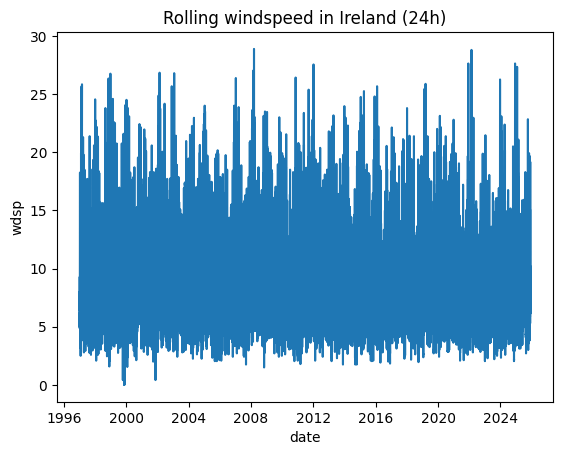

In [13]:
# plot rolling windspeed
sns.lineplot(data=weather_rolling_wdsp, x = 'date', y = 'wdsp')
plt.title('Rolling windspeed in Ireland (24h)')

I compared the difference between rolling mean and resampling over 1 day (24h), and plotted the difference: the plots are, in fact, different.

In [14]:
# Does rolling look very similar to resampling per day? 

# re-sample windspeed per month start
daily_wdsp_mean = weather_wdsp['wdsp'].resample('D').mean().round(2)
weather_wdsp_daily = pd.DataFrame({"mean wdsp" : daily_wdsp_mean}, index = daily_wdsp_mean.index)

#show 
weather_wdsp_daily.head(5)

,mean wdsp
date,
1997-01-01,7.38
1997-01-02,5.79
1997-01-03,5.96
1997-01-04,5.42
1997-01-05,5.83


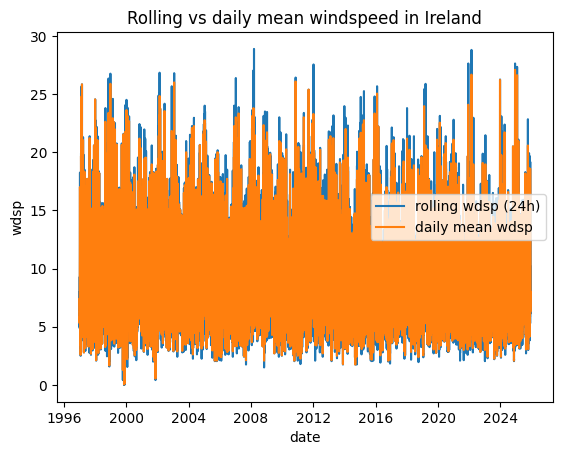

In [15]:
# compare with daily average 

# plot the montly data 
sns.lineplot(data=weather_rolling_wdsp, x = 'date', y = 'wdsp', label = 'rolling wdsp (24h)')
sns.lineplot(data = weather_wdsp_daily, x = 'date', y = 'mean wdsp', label = 'daily mean wdsp')
plt.title('Rolling vs daily mean windspeed in Ireland')
plt.legend(loc = 'center right')

### Daily max windspeed

To calculate the max windspeed for each day, the resampling method is used again, and the method max(). 

In [16]:
# plot max windspeed each daily 
# see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html
daily_w_max = weather_wdsp['wdsp'].resample('D').max().round(2)
weather_wdsp_daily['max wdsp'] = daily_w_max 

# show
#weather_wdsp_daily.head(5)

Text(0.5, 1.0, 'Daily maximum windspeed in Ireland')

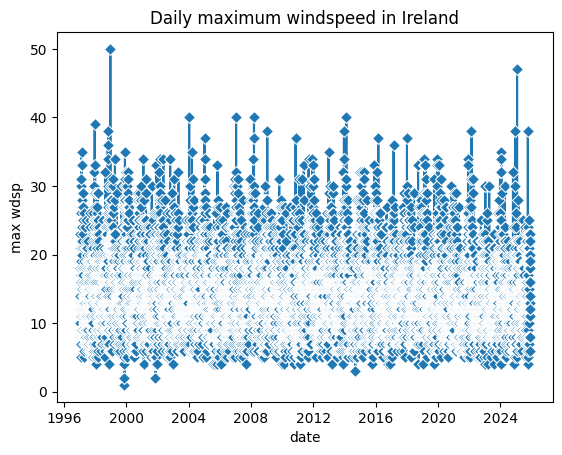

In [17]:
# plot the data
sns.lineplot(data = weather_wdsp_daily, x = 'date', y = 'max wdsp', marker='D')
plt.title('Daily maximum windspeed in Ireland')

### Monthly mean of the daily max windspeed

Finally, a new dataframe is created to resample the max daily windspeed per Month Start, and calculate the mean. 

In [18]:
# resample daily max to get monthly mean of max wdsp
monthly_wdsp_max_mean  = weather_wdsp_daily['max wdsp'].resample('MS').mean().round(2)
weather_wdsp_monthly = pd.DataFrame({'wdsp max': monthly_wdsp_max_mean}, index = monthly_wdsp_max_mean.index)

# show 
# weather_wdsp_monthly.head(3)

Text(0.5, 1.0, 'Monthly mean of daily maximum windspeed in Ireland')

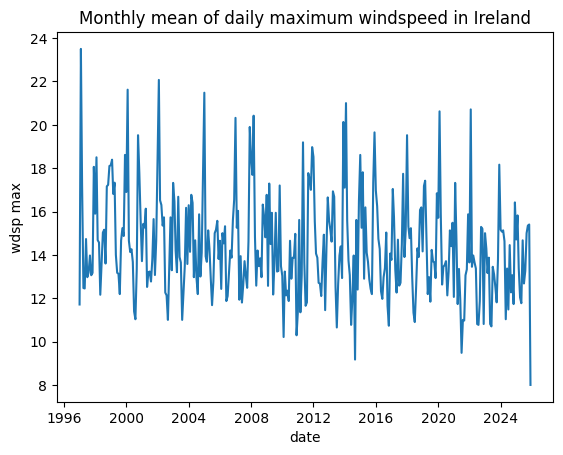

In [19]:
# plot the data 
sns.lineplot(data = weather_wdsp_monthly, x = 'date', y = 'wdsp max')
plt.title('Monthly mean of daily maximum windspeed in Ireland')

Interestingly, the trends highlighted in the last two plots don't seem to show the same trend. What can be observed it that: 
- there might have been daily spiked in windspeed that didn't significantly affect the average max. 
- based on the last plot, the trend of average max windspeed seems to be slowly descresing over time. 
- based on last plot, there must have been a particulary windy day/days, around 1998 and in 2025. 

## End